#### Image Classification using Tensorflow and keras

In [30]:
#import Libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [31]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [32]:
#Data shape in X_train
X_train.shape

(50000, 32, 32, 3)

In [33]:
#Data shape in X_test
X_test.shape

(10000, 32, 32, 3)

In [34]:
#Normalize Dataset
X_train=X_train/255
X_test=X_test/255

In [35]:
#two dimensional to one dimensional array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [36]:
#Model Building

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [37]:
#Model Compile

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
#training the model
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 80s 49ms/step - loss: 1.3889 - accuracy: 0.5030
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0328 - accuracy: 0.6407
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8777 - accuracy: 0.6951
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7571 - accuracy: 0.7366
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.6499 - accuracy: 0.7733
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5536 - accuracy: 0.8075
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.4600 - accuracy: 0.8401
Epoch 8/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.3765 - accuracy: 0.8697
Epoch 9/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.3030 - accuracy: 0.8951
Epoch 10/10
1563/1563 [==============================] - 69s 44m

In [40]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 12s 12ms/step - loss: 1.2742 - accuracy: 0.6829


[1.274167537689209, 0.6829000115394592]

In [41]:
y_pred = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [42]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [43]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [44]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [45]:
def plot_image(x, y, ind):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

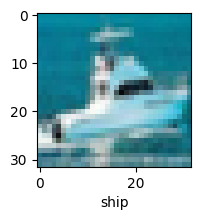

In [46]:
plot_image(X_test, y_test,1200)

In [47]:
#Model Saving
model.save('model.h5')